# Simple Linear Regression

In this notebook, a simple linear regression model is built to predict the package using cgpa.

1. Reading and Understanding the Data
2. Training the model
3. Residual Analysis
4. Predicting and Evaluating the model on the test set.

## Step 1: Reading and Understanding the Data

In [1]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

# import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# import the data
data = pd.read_csv('/kaggle/input/cgpa-vs-package-in-lpa/placement.csv')
data.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [3]:
# let's look at the shape of the data
data.shape

(200, 2)

There are 200 rows and 2 columns in the data.

In [4]:
# info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [5]:
# statistical summary of the data
data.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [6]:
# missing values in the data
data.isnull().sum()

cgpa       0
package    0
dtype: int64

There are no missing values in the data.

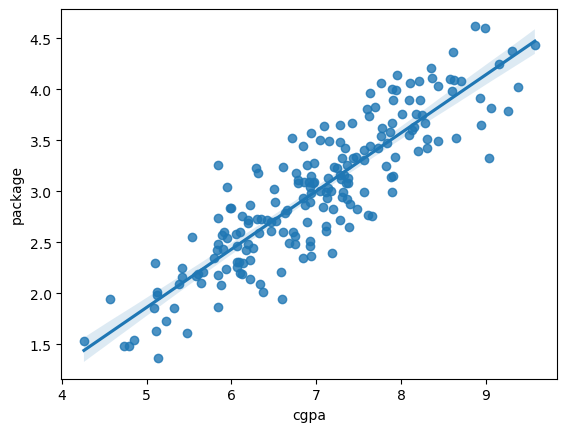

In [7]:
# Visualize the data
sns.regplot(x = data['cgpa'], y = data['package'])
plt.show()

From the above graph, it is clear that cgpa and package are linearly correlated.

## Step 2: Performing Simple Linear Regression

## Steps of Model Building

- Create X and y
- Create train and test sets
- Train the model on training set (i.e. learn the coefficients)
- Evaluate the model on training set and test set

In [8]:
# create X and y
# 'cgpa' is an independent variable and 'package' is a dependent variable
X = data['cgpa']
y = data['package']

In [9]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

print('The shape of X_train is', X_train.shape)
print('The shape of X_test is', X_test.shape)
print('The shape of y_train is', y_train.shape)
print('The shape of y_test is', y_test.shape)

The shape of X_train is (140,)
The shape of X_test is (60,)
The shape of y_train is (140,)
The shape of y_test is (60,)


In [10]:
# X_train and X_test are a series and we want to convert them to the 2D array for model building
# reshape X_train and X_test to (n,1)
X_train_lm = X_train.values.reshape(-1, 1)
print('The shape of X_train_lm is', X_train_lm.shape)
X_test_lm = X_test.values.reshape(-1, 1)
print('The shape of X_test_lm is', X_test_lm.shape)

The shape of X_train_lm is (140, 1)
The shape of X_test_lm is (60, 1)


### steps in sklearn model building

1. Create an object of linear regression
2. fit the model
3. see the parameters
4. make predictions
5. Evaluate the model

In [11]:
# create an object of linear regression
lm = LinearRegression()

In [12]:
# fit the model
lm.fit(X_train_lm, y_train)

LinearRegression()

In [13]:
# see the parameters
print('The coefficient is', round(lm.coef_[0], 2))
print('The intercept is', round(lm.intercept_, 2))

The coefficient is 0.58
The intercept is -1.07


In [14]:
# make predictions on the training set
y_train_pred = lm.predict(X_train_lm)

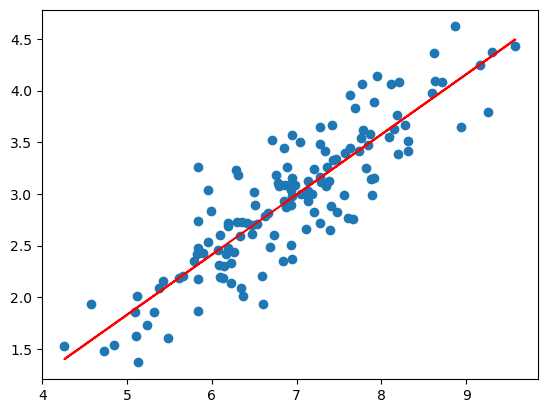

In [15]:
# plot the model
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, color = 'r')
plt.show()

## Step 3: Residual Analysis

In [16]:
# residual
res = y_train - y_train_pred

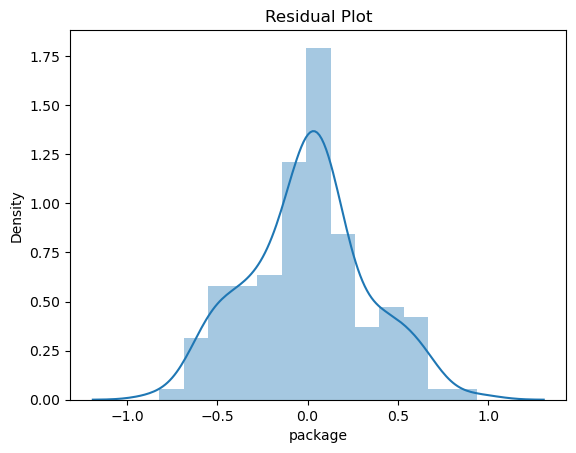

In [17]:
# plot the residuals
sns.distplot(res)
plt.title('Residual Plot')
plt.show()

The center of the normal distribution is around zero. The shape is also looks like a normal distribution.

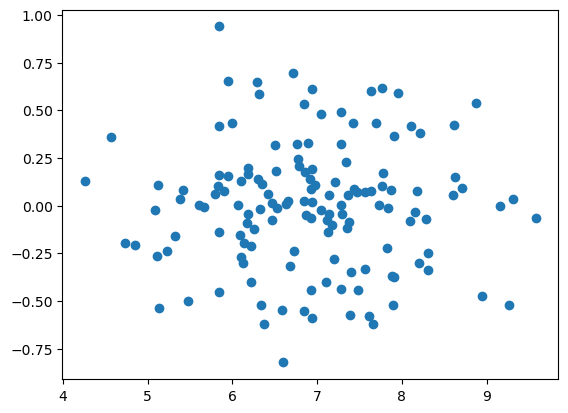

In [18]:
# look for patterns in residuals (we should not able to identify any patterns)
plt.scatter(X_train, res)
plt.show()

The residuals don't follow any patterns. So, the asssumptions of Simple Linear Regression are validated.

## Step 4: Predictions and Evaluation on Test Set

In [19]:
# make predictions on the test set
y_test_pred = lm.predict(X_test_lm)

In [20]:
# evaluate the model
print('The R-squared for the training set is', round(r2_score(y_true = y_train, y_pred = y_train_pred), 2))
print('The R-squared for the test set is', round(r2_score(y_true = y_test, y_pred = y_test_pred), 2))

The R-squared for the training set is 0.77
The R-squared for the test set is 0.78


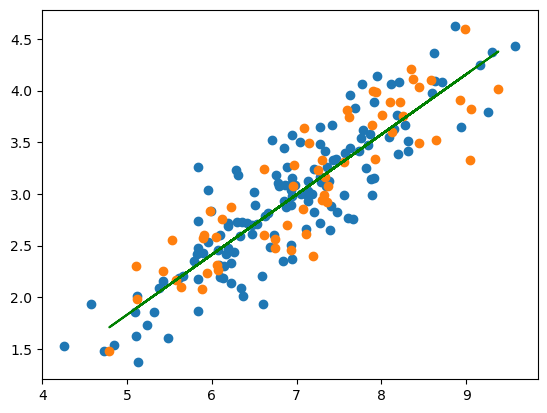

In [21]:
# plot the model with the test set
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, color = 'g')
plt.show()